In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

In [87]:
data, meta = arff.loadarff('php0iVrYT.arff')

# Convert to pandas DataFrame
df_0 = pd.DataFrame(data)


In [88]:
df_0.head()

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


In [89]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    float64
 1   V2      748 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   Class   748 non-null    object 
dtypes: float64(4), object(1)
memory usage: 29.3+ KB


In [90]:
df_0.Class.value_counts()
df_0["Class"] = df_0.Class.astype("category")

In [91]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      748 non-null    float64 
 1   V2      748 non-null    float64 
 2   V3      748 non-null    float64 
 3   V4      748 non-null    float64 
 4   Class   748 non-null    category
dtypes: category(1), float64(4)
memory usage: 24.4 KB


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>],
       [<AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>]], dtype=object)

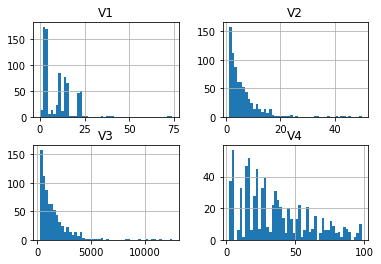

In [92]:
df_0.hist(bins = 50)

In [93]:
df_0.describe()

,V1,V2,V3,V4
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [94]:
df_0.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

In [95]:
corr_matrix = df_0.corr()

In [96]:
corr_matrix['Class'].sort_values(ascending=False)

Class    1.000000
V3       0.218633
V2       0.218633
V4      -0.035854
V1      -0.279869
Name: Class, dtype: float64

<AxesSubplot:>

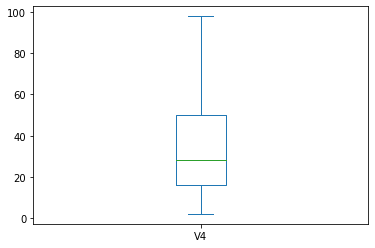

In [97]:
df_0.plot(kind = 'box', y='V4', x = 'Class')

In [98]:
X = df_0.drop(['Class'], axis = 1)
y = df_0[['Class']]

In [99]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe_data = oe.fit_transform(y)
y = pd.DataFrame(oe_data, columns= ['target'])
y

,target
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
743,0.0
744,0.0
745,0.0
746,0.0


In [103]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# X_feature_names = scaler.get_feature_names_out()
# X_feature_names

X_normalized = X.copy()
from scipy import stats
cols = X.columns[1:]
# X_normalized = stats.boxcox(X)
# for col in X.columns[1:]:
    # X_normalized[col] = stats.boxcox(X_normalized[col])
# X.columns[1:]


Index(['V2', 'V3', 'V4'], dtype='object')

In [57]:
X = pd.DataFrame(X_scaled, columns = X_feature_names)

In [58]:
X.describe()

,V1,V2,V3,V4
count,748.000000,748.000000,748.000000,748.000000
mean,0.128469,0.092137,0.092137,0.336272
std,0.109397,0.119170,0.119170,0.253924
min,0.000000,0.000000,0.000000,0.000000
25%,0.037162,0.020408,0.020408,0.145833
50%,0.094595,0.061224,0.061224,0.270833
75%,0.189189,0.122449,0.122449,0.500000
max,1.000000,1.000000,1.000000,1.000000


In [59]:
y.describe()

,target
count,748.000000
mean,0.237968
std,0.426124
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [71]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

model.score(X_test, y_test)

0.7593582887700535

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)
model.score(X_test, y_test)

/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8074866310160428

In [73]:
from sklearn import svm
model = svm.SVC()

model.fit(X_train,y_train)
model.score(X_test, y_test) 

/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.786096256684492

In [79]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(),X,y, cv =5)

/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anikeet/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [81]:
score.mean()

0.774102908277405